### 安装pygal

In [23]:
1270297/5990263

0.21206030519861982

In [ ]:
# !pip install pygal

In [19]:
import time
import requests
import itertools

def get_page(data='python', page=1):
    url = f"https://api.github.com/search/repositories?q={data}&sort=stars&page={page}"
    resp = requests.get(url)
    data = resp.json()
    repos = []
    for repo in data['items']:
        repos.append({
            'name': repo['name'],
            'stars': repo['stargazers_count'],
            'owner': repo['owner']['login'],
            'url': repo['html_url'],
            'desc': repo['description'],
            'time': time.strftime("%Y%m%d%H%M%S", time.localtime(time.time()))
        })
    return repos

langs = "python"
data = list(itertools.chain(*[get_page(data=langs, page=i) for i in range(1,11)]))
print(len(data))


300


In [20]:
import pandas as pd
df = pd.DataFrame(data)
with pd.ExcelWriter('Github_top_300.xlsx', mode='w', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name=f'{langs}', columns=["name", "stars", "owner", "desc", "url", "time"])

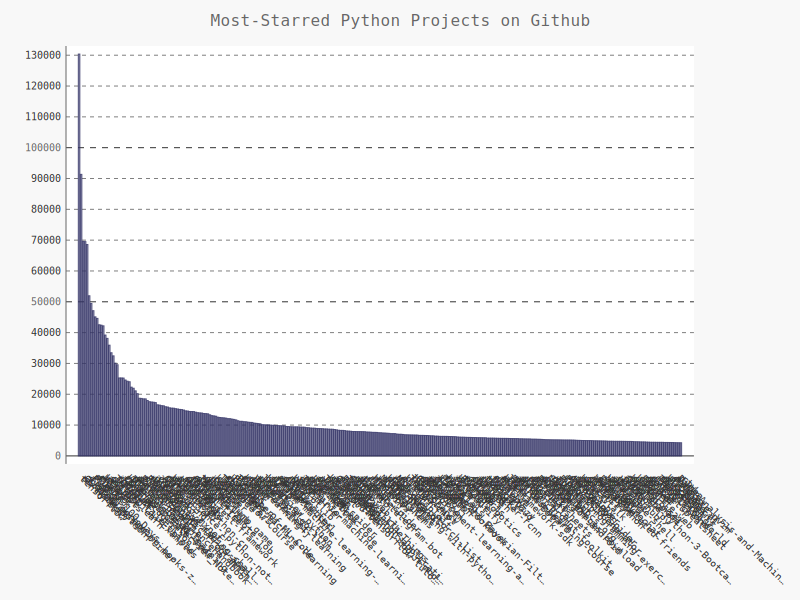

In [21]:
import pygal
from pygal.style import LightColorizedStyle as LCS,LightenStyle as LS
from IPython.display import SVG, display  # 为了在jupyter中显示图片
names = [i.get('name') for i in data]
stars = [i.get('stars') for i in data]

my_style = LS('#333366', base_style=LCS)
chart = pygal.Bar(style=my_style, x_label_rotation=45, show_legend=False)
chart.title = 'Most-Starred Python Projects on Github'
chart.x_labels = names
chart.add('',stars)
# chart.render()
display(SVG(chart.render(disable_xml_declaration=True)))
# chart.render_to_file('python_repos.svg')

Status code: 200
Total repositories: 1126385
Repositories returned: 30

Selected information about each repository:

Name: javascript
Owner: airbnb
Stars: 86766
Repository: https://github.com/airbnb/javascript
Description: JavaScript Style Guide

Name: CS-Notes
Owner: CyC2018
Stars: 69581
Repository: https://github.com/CyC2018/CS-Notes
Description: :books: Tech Interview Guide 技术面试必备基础知识、Leetcode 题解、Java、C++、Python、后端面试、操作系统、计算机网络、系统设计

Name: javascript-algorithms
Owner: trekhleb
Stars: 50617
Repository: https://github.com/trekhleb/javascript-algorithms
Description: 📝 Algorithms and data structures implemented in JavaScript with explanations and links to further readings

Name: java-design-patterns
Owner: iluwatar
Stars: 48821
Repository: https://github.com/iluwatar/java-design-patterns
Description: Design patterns implemented in Java

Name: JavaGuide
Owner: Snailclimb
Stars: 47065
Repository: https://github.com/Snailclimb/JavaGuide
Description: 【Java学习+面试指南】 一份涵盖大部分Java程序员所需要掌握的核心知识。


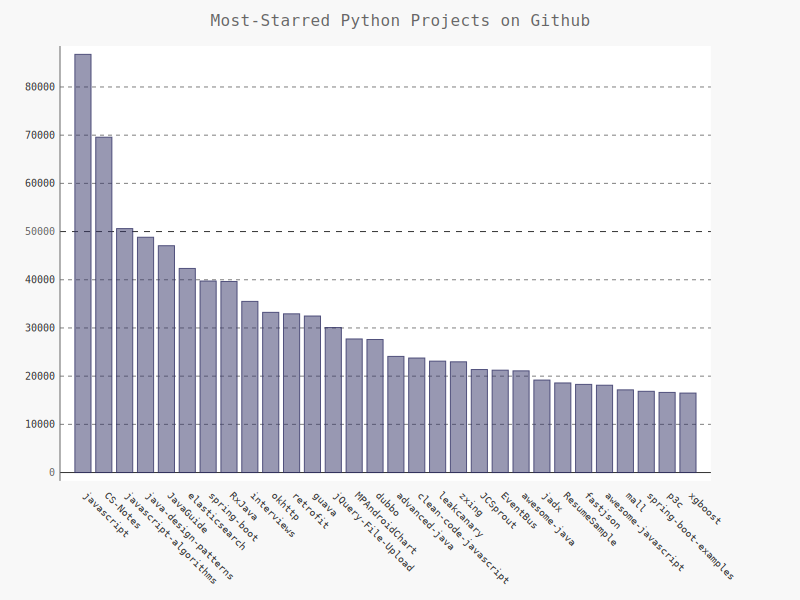

In [7]:
import  requests
import pygal
from pygal.style import LightColorizedStyle as LCS,LightenStyle as LS
from IPython.display import SVG, display  # 为了在jupyter中显示图片
# 调用接口获取star信息
# URL = 'https://api.github.com/search/repositories?q=language:python&sort=stars'  
URL = 'https://api.github.com/search/repositories?q=java&sort=stars&page=1'  # 按仓库计算
# URL = 'https://api.github.com/search/repositories?q=python&sort=stars'  # 按仓库计算
r = requests.get(URL)
print("Status code:",r.status_code)
response_dict = r.json()
print("Total repositories:",response_dict['total_count'])
repo_dicts = response_dict['items']
print("Repositories returned:",len(repo_dicts))
print("\nSelected information about each repository:")
for repo_dict in repo_dicts:
    print("\nName:",repo_dict['name'])
    print("Owner:",repo_dict['owner']['login'])
    print("Stars:",repo_dict['stargazers_count'])
    print("Repository:",repo_dict['html_url'])
    print("Description:",repo_dict['description'])
names,stars = [],[]
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])
my_style = LS('#333366',base_style=LCS)
chart = pygal.Bar(style=my_style,x_label_rotation=45,show_legend=False)
chart.title = 'Most-Starred Python Projects on Github'
chart.x_labels = names
chart.add('',stars)
# chart.render()
display(SVG(chart.render(disable_xml_declaration=True)))
# chart.render_to_file('python_repos.svg')